In [28]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing, svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [2]:
os.chdir(r"C:\Users\Stifmeister\Downloads\pima-indians-diabetes-database")
print(os.getcwd())
print(os.listdir(os.getcwd()))

C:\Users\Stifmeister\Downloads\pima-indians-diabetes-database
['diabetes.csv']


In [4]:
df=pd.read_csv('diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#This shows the presence of no null values

In [7]:
df.isnull().values.sum()

0

In [8]:
import pandas_profiling as pp

In [9]:
pp.ProfileReport(df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:404: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,9
Number of observations,768
Total Missing (%),0.0%
Total size in memory,54.1 KiB
Average record size in memory,72.2 B
Numeric,8
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


#The data does have many zero values which are to be replaced

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
d=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
d.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [12]:
#Replace NaN to mean value to explore dataset

df['Glucose'].fillna(df['Glucose'].median(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
#df['Pregnancies'].fillna(df['Pregnancies'].median(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [28]:
#pp.ProfileReport(df)

#Data Visualization


In [13]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

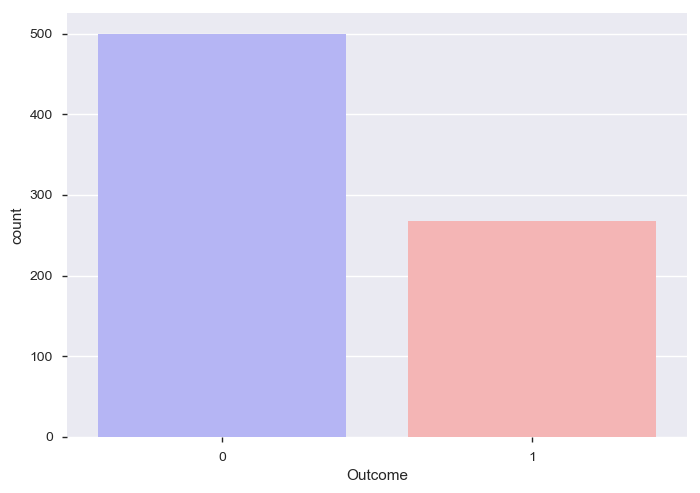

In [14]:
sns.countplot(x="Outcome",data=df,palette="bwr")

In [15]:
DiabetesP=len(df[df.Outcome==1])
DiabetesN=len(df[df.Outcome==0])
print("The % of patients with Diabetes is:",round((DiabetesP/len(df))*100,2))
print("The % of patients without Diabetes is:",round((DiabetesN/len(df))*100,2))

The % of patients with Diabetes is: 34.9
The % of patients without Diabetes is: 65.1


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


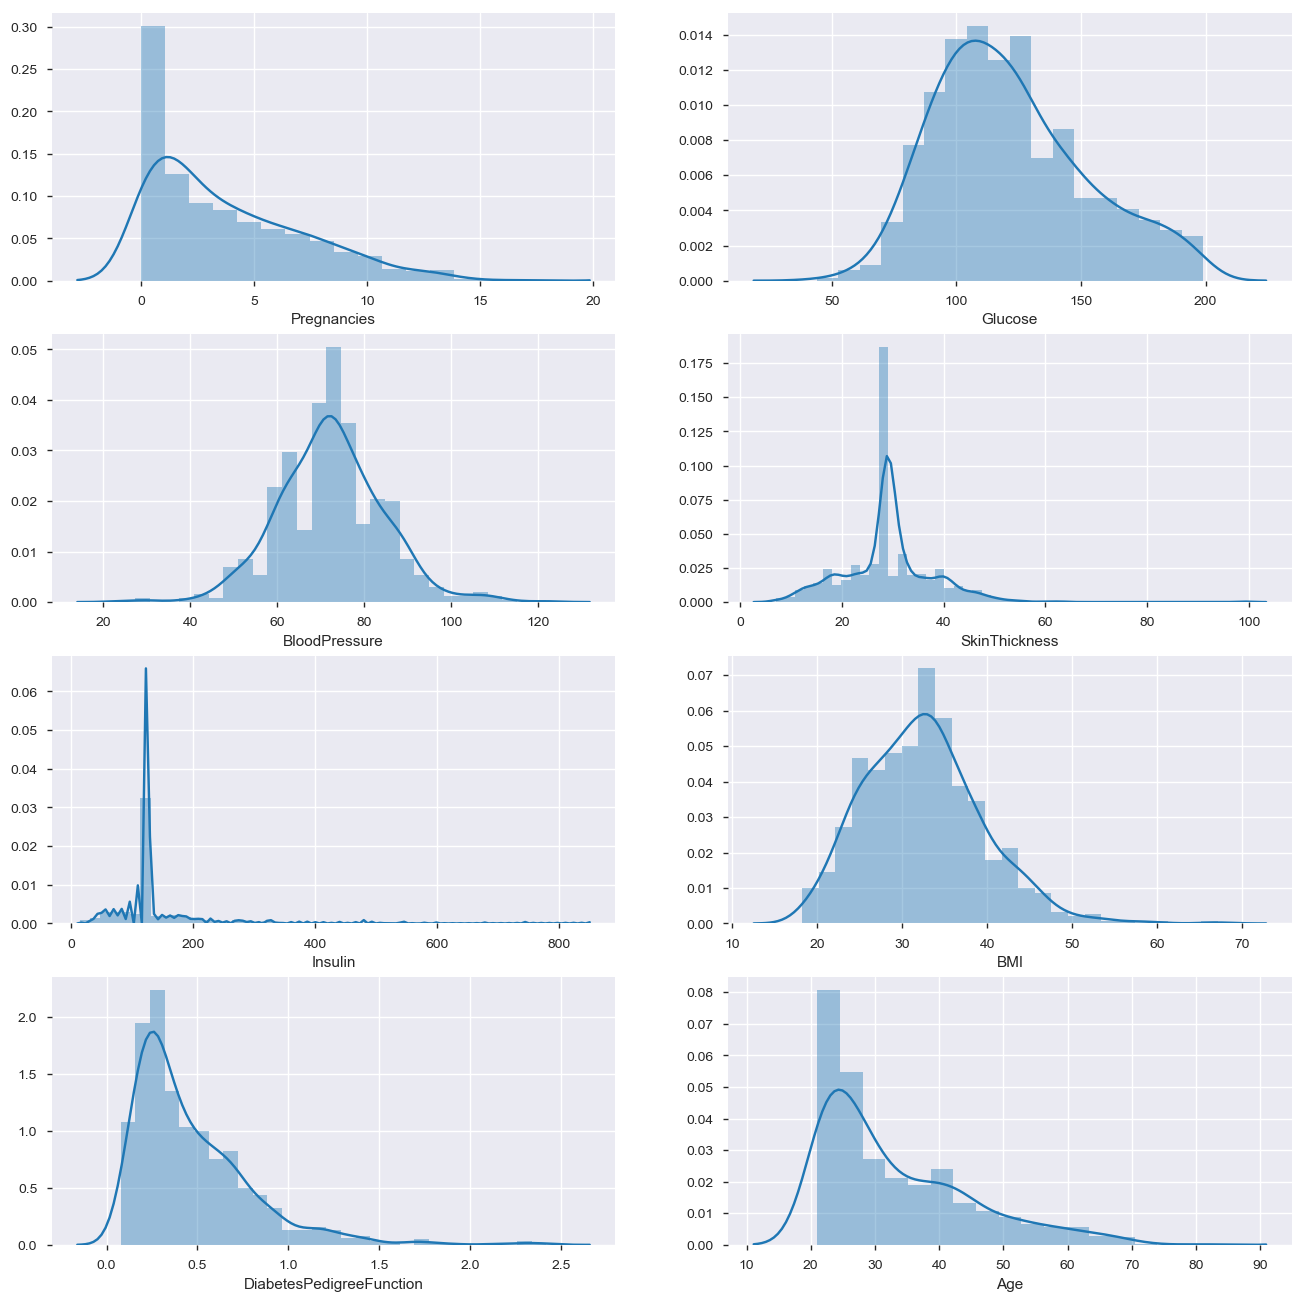

In [16]:
# Distplot

fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(df['Pregnancies'],ax=ax2[0][0])
sns.distplot(df['Glucose'],ax=ax2[0][1])
sns.distplot(df['BloodPressure'],ax=ax2[1][0])
sns.distplot(df['SkinThickness'],ax=ax2[1][1])
sns.distplot(df['Insulin'],ax=ax2[2][0])
sns.distplot(df['BMI'],ax=ax2[2][1])
sns.distplot(df['DiabetesPedigreeFunction'],ax=ax2[3][0])
sns.distplot(df['Age'],ax=ax2[3][1])

#Pregnancies, Insulin, Age, DiabetesPedigreeFunction are rightly skewed.

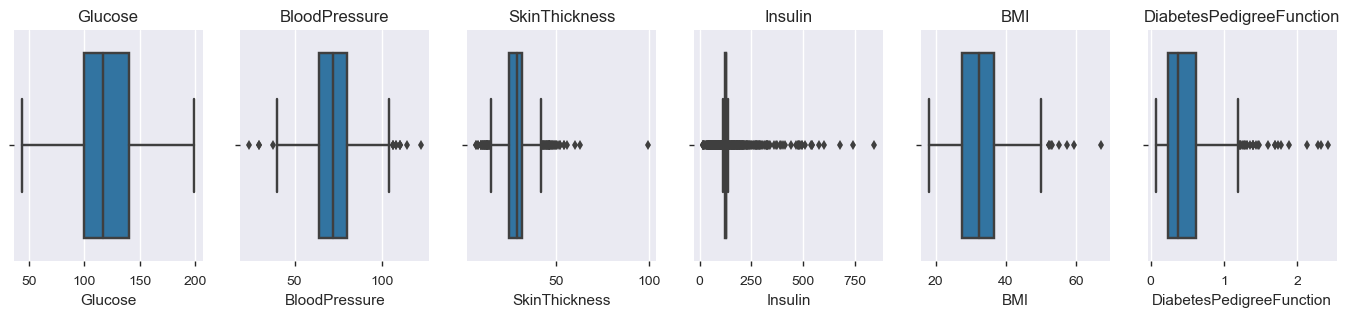

In [17]:
# boxplot

fig=plt.figure(figsize=(20,3))

for i in np.arange(1,7):
    data3=plt.subplot(1,7,i,title=df.columns[i])
    sns.boxplot(df[df.columns[i]])

#BloodPressure,SkinThickness,Insulin,BMI have outliers.It is clearly visible in the boxplots. ie some values lie outside the percentile ratio in this dataset.

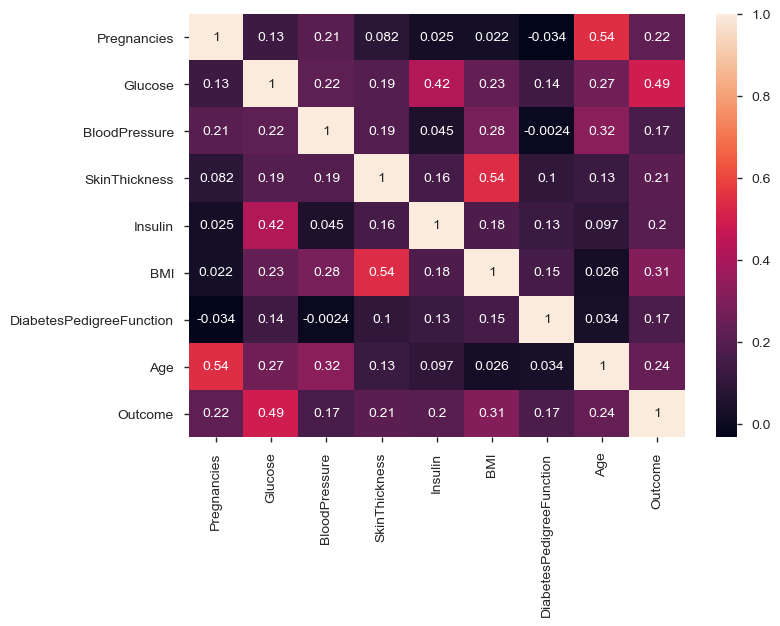

In [18]:
# heatmap
sns.heatmap(df.corr(), annot=True)

#The correlation plot shows the relation between the parameters.

1.Glucose,Age,BMI and Pregnancies are the most correlated parameters with the Outcome.
2.Insulin and DiabetesPedigreeFunction have little correlation with the outcome.
3.BloodPressure and SkinThickness have tiny correlation with the outcome.
There is a little correlation between Age and Pregnancies,Insulin and Skin Thickness, BMI and Skin Thickness,Insulin and Glucose
4.We choose 4 features for analysis-Age,BMi,Preganancies,Glucose on aspect of their correlation with outcome

In [46]:
#Bi-variate Ananlysis viz a viz the outcome

In [19]:
#Age viz outcome
Ageu30=[]
Ageu40=[]
Ageu50=[]
Agea50=[]
for i in range(len(df)):
    if(df['Age'][i]<=30 and df['Outcome'][i]==1):
        Ageu30.append(df['Age'][i])
    elif(df['Age'][i]>30 and df['Age'][i]<=40 and df['Outcome'][i]==1):
        Ageu40.append(df['Age'][i])
    elif(df['Age'][i]>40 and df['Age'][i]<=50 and df['Outcome'][i]==1):
        Ageu50.append(df['Age'][i])
    elif(df['Age'][i]>50 and df['Outcome'][i]==1):
        Agea50.append(df['Age'][i])
AgeP=[]
AgeP=Ageu30+Ageu40+Ageu50+Agea50

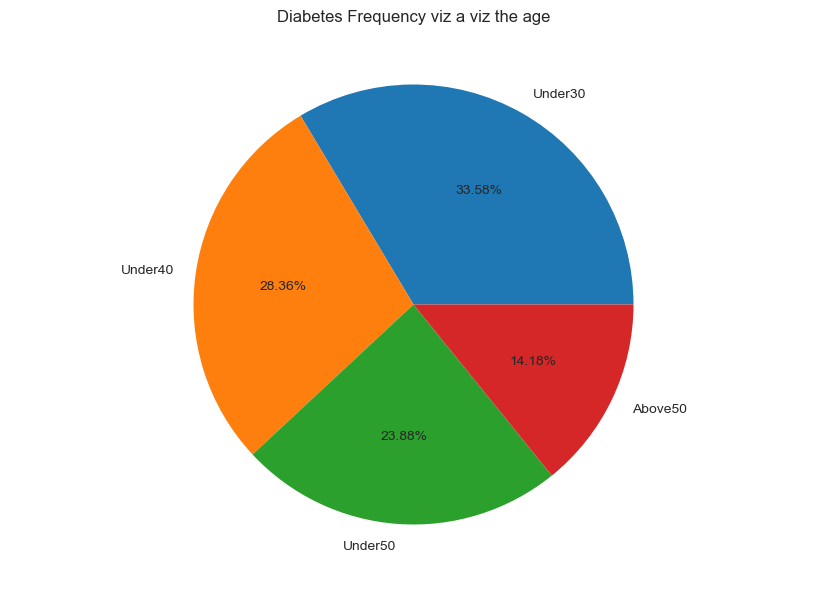

Average Age Of a Diabetic Person: 37


In [20]:
import numpy as np
import statistics
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
AgeGrp= ['Under30', 'Under40', 'Under50', 'Above50']
Freq = [len(Ageu30),len(Ageu40),len(Ageu50),len(Agea50)]
ax.pie(Freq, labels = AgeGrp,autopct='%1.2f%%')
plt.title('Diabetes Frequency viz a viz the age')
plt.show()
print("Average Age Of a Diabetic Person:",round(statistics.mean(AgeP)))

##It can be Infered that diabetes is a common in late 30's

#What is the body mass index (BMI)? 
The body mass index (BMI) is a measure that uses your height and weight to work out if your weight is healthy.
The BMI calculation divides an adult's weight in kilograms by their height in metres squared.
If your BMI is:
below 18.5 – you're in the underweight range 
between 18.5 and 24.9 – you're in the healthy weight range
between 25 and 29.9 – you're in the overweight range 
between 30 and 39.9 – you're in the obese range 

In [21]:
BmiP=[]
BmiN=[]
for i in range(len(df)):
    if(df['Outcome'][i]==0):
        BmiN.append(df['BMI'][i])
    else:
        BmiP.append(df['BMI'][i])
print("Average BMI of A Patient",round(statistics.mean(df['BMI']),0))       
print("Average BMI Of Diabetic Patients:",round(statistics.mean(BmiP),0))
print("Average BMI Of Non Diabetic Patients:",round(statistics.mean(BmiN),0))

Average BMI of A Patient 32.0
Average BMI Of Diabetic Patients: 35.0
Average BMI Of Non Diabetic Patients: 31.0


#Inference Drawn From The above data shows that Diabetes is a direct consequence of Obesity

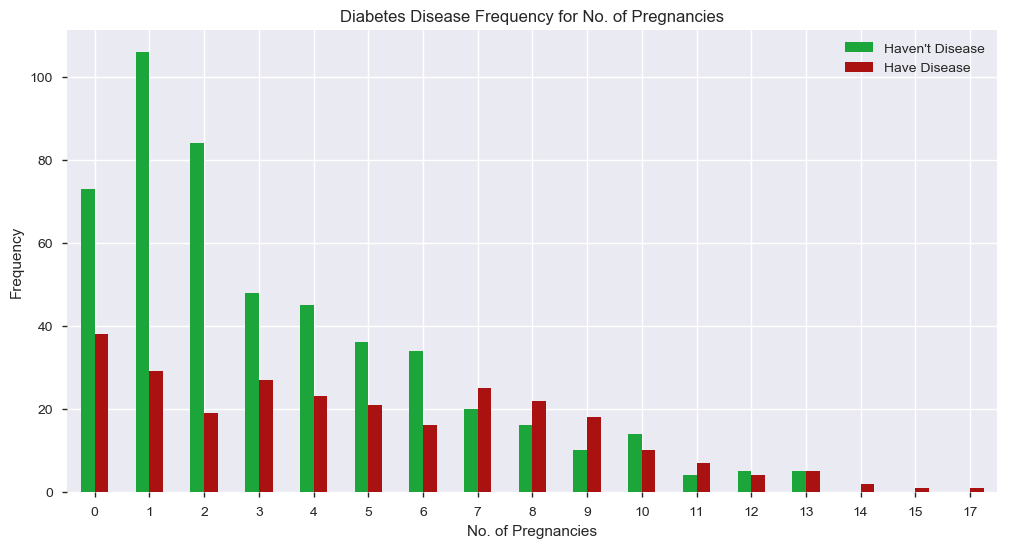

In [22]:
pd.crosstab(df.Pregnancies,df.Outcome).plot(kind="bar",figsize=(12,6),color=['#1CA53B','#AA1111' ])
plt.title('Diabetes Disease Frequency for No. of Pregnancies')
plt.xlabel('No. of Pregnancies')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

#Analysis of 'Glucose' parameter

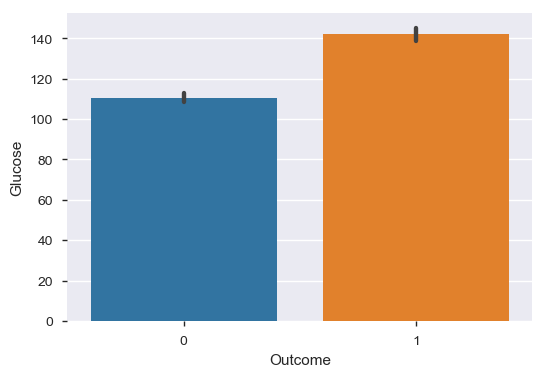

In [23]:
fig= plt.figure( figsize=(6, 4))
sns.barplot(df['Outcome'],df['Glucose'])

In [25]:
#Implementing and finding linear relation b/w BMI,Glucose And Age vs Outcome
from sklearn import linear_model
regr=linear_model.LinearRegression()
y=df['Outcome']
x=df[['BMI','Age','Glucose']]
regr.fit(x,y)
print("Coefficients:",regr.coef_)
print("Intercept:",round(regr.intercept_,2))

Coefficients: [0.01484982 0.00500205 0.00643083]
Intercept: -1.08


#Model Fitting

In [26]:
X = np.array(df.drop(['Outcome','BloodPressure'], 1))
Y=np.array(df['Outcome'])


In [29]:
X = preprocessing.scale(X)#preprocessing or normalizing the data i.e. on the scale between -1 to 1 generally
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)  #splitting the training data vs test data in ratio of 4:1


#Logistic Regression

In [30]:
accuracies = {}

lr = LogisticRegression()
lr.fit(X_train,y_train)
acc = lr.score(X_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 74.68%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))

2 NN Score: 72.08%


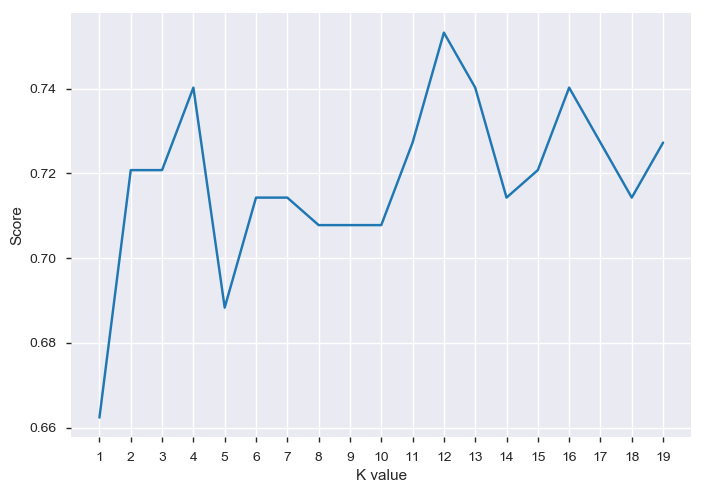

Maximum KNN Score is 75.32%
at n= 12


In [32]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
n=scoreList.index(max(scoreList))
acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))
print("at n=",n+1)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = n+1)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(n+1, knn.score(X_test, y_test)*100))

12 NN Score: 75.32%


#SVM

In [38]:
from sklearn.svm import SVC

In [39]:
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

acc = svm.score(X_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 73.38%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [40]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

acc = rf.score(X_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 75.97%


#plotting accuracy

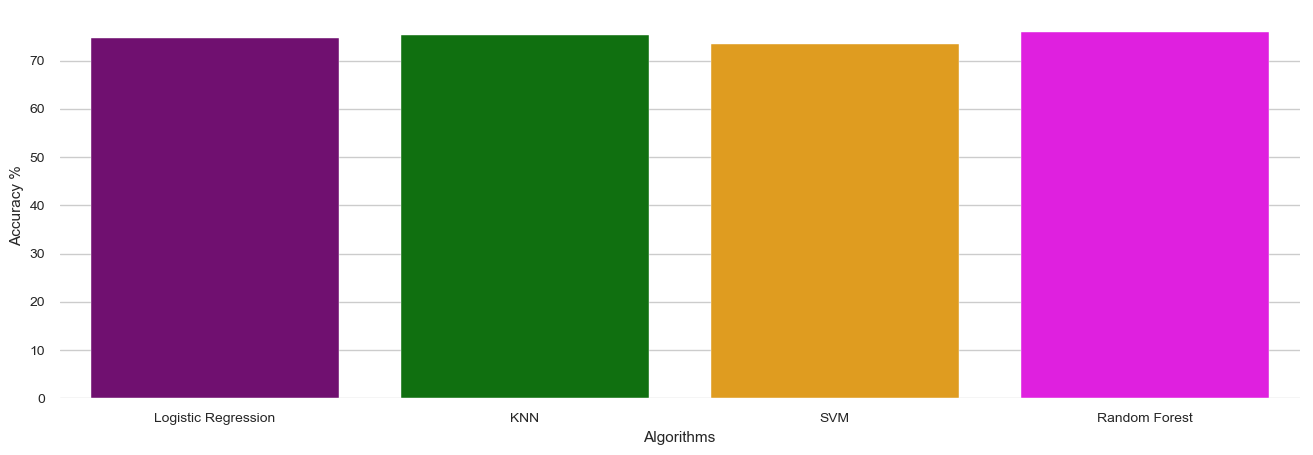

In [41]:
colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

#Our models work fine but best of them are KNN and Random Forest

#Confusion Matrices

In [42]:
# Predicted values
y_head_lr = lr.predict(X_test)
knn3 = KNeighborsClassifier(n_neighbors = n+1)
knn3.fit(X_train, y_train)
y_head_knn = knn3.predict(X_test)
y_head_svm = svm.predict(X_test)
y_head_rf = rf.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)

cm_rf = confusion_matrix(y_test,y_head_rf)

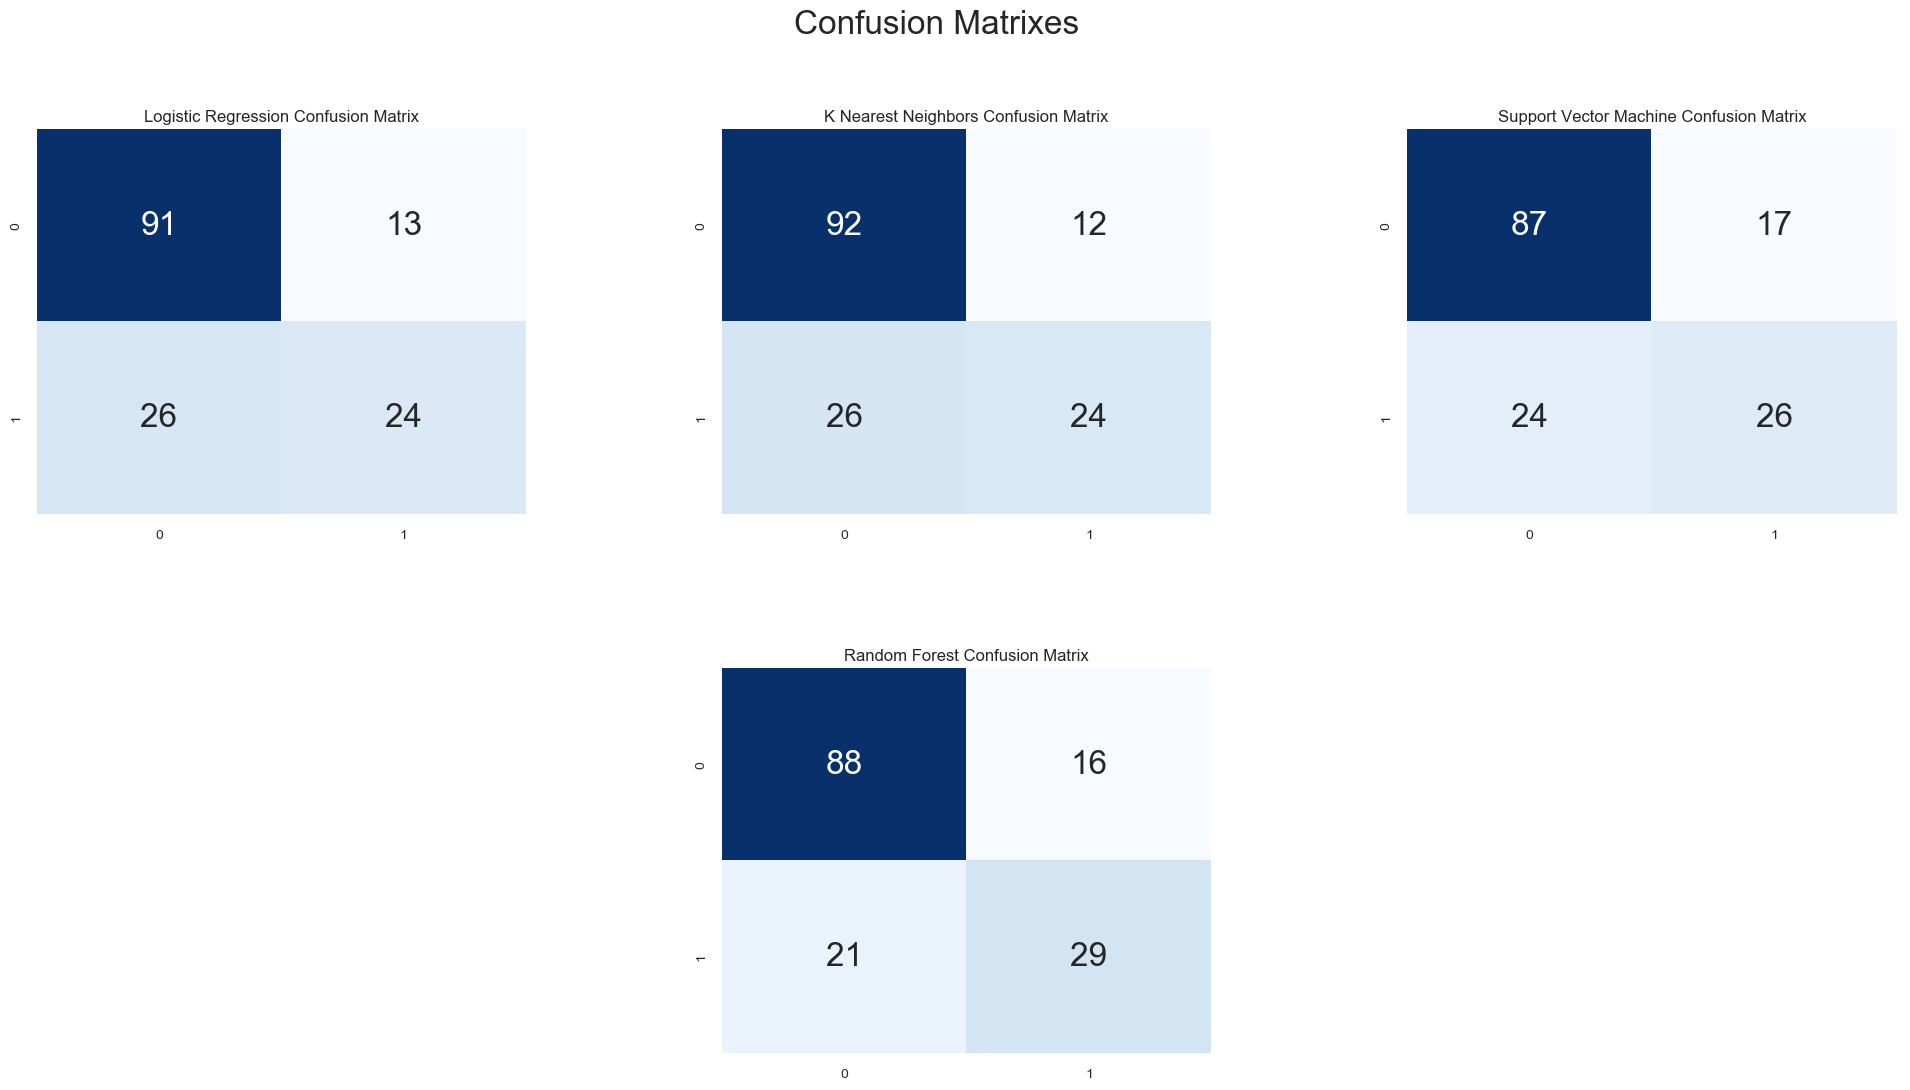

In [46]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

#By Analysing the above confusion matrices KNN seems to be the best fit among all the algorithms

In [62]:
preds=df.Outcome[knn.predict([[1,137.0,35.0,168.0,43.1,2.288,33],[1,89.0,23.0,94.0,28.1,0.167,21]])]
preds

1    0
1    0
Name: Outcome, dtype: int64

#Fitting a Deep Neural Network

In [67]:
from keras import Sequential
from keras.layers import Dense
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=7))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [69]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=8, epochs=50)
val_loss, val_acc = classifier.evaluate(X_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

Epoch 1/50
614/614 [==============================] - 2s 3ms/step - loss: 0.4597 - acc: 0.7883
Epoch 2/50
614/614 [==============================] - 0s 372us/step - loss: 0.4589 - acc: 0.7850
Epoch 3/50
614/614 [==============================] - 0s 293us/step - loss: 0.4584 - acc: 0.7899
Epoch 4/50
614/614 [==============================] - 0s 329us/step - loss: 0.4581 - acc: 0.7948
Epoch 5/50
614/614 [==============================] - 0s 322us/step - loss: 0.4569 - acc: 0.7850
Epoch 6/50
614/614 [==============================] - 0s 357us/step - loss: 0.4563 - acc: 0.7883
Epoch 7/50
614/614 [==============================] - 0s 381us/step - loss: 0.4559 - acc: 0.7883
Epoch 8/50
614/614 [==============================] - 0s 366us/step - loss: 0.4548 - acc: 0.7850
Epoch 9/50
614/614 [==============================] - 0s 288us/step - loss: 0.4546 - acc: 0.7850
Epoch 10/50
614/614 [==============================] - 0s 337us/step - loss: 0.4541 - acc: 0.7850
Epoch 11/50
614/614 [==========

In [70]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[83 21]
 [18 32]]


#The above stats show that the deep neural network overfits the data and can also be validated by its confusion matrix.
 Therefore,for the above dataset we might just use KNN or Random Forest as our model.